# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [ ]:
#ФИО:Михайлова Ксения   Домашнее задание (Кластеризация)

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [4]:
data_cmt = pd.read_excel('geo_comment.xlsx')

In [5]:
data = pd.read_excel('geo.xlsx')

In [6]:
data_cmt.head()

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [7]:
data.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [ ]:
#визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [25]:
X=data.loc[:,['x','y']]

In [26]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)

In [27]:
id_label=kmeans.labels_

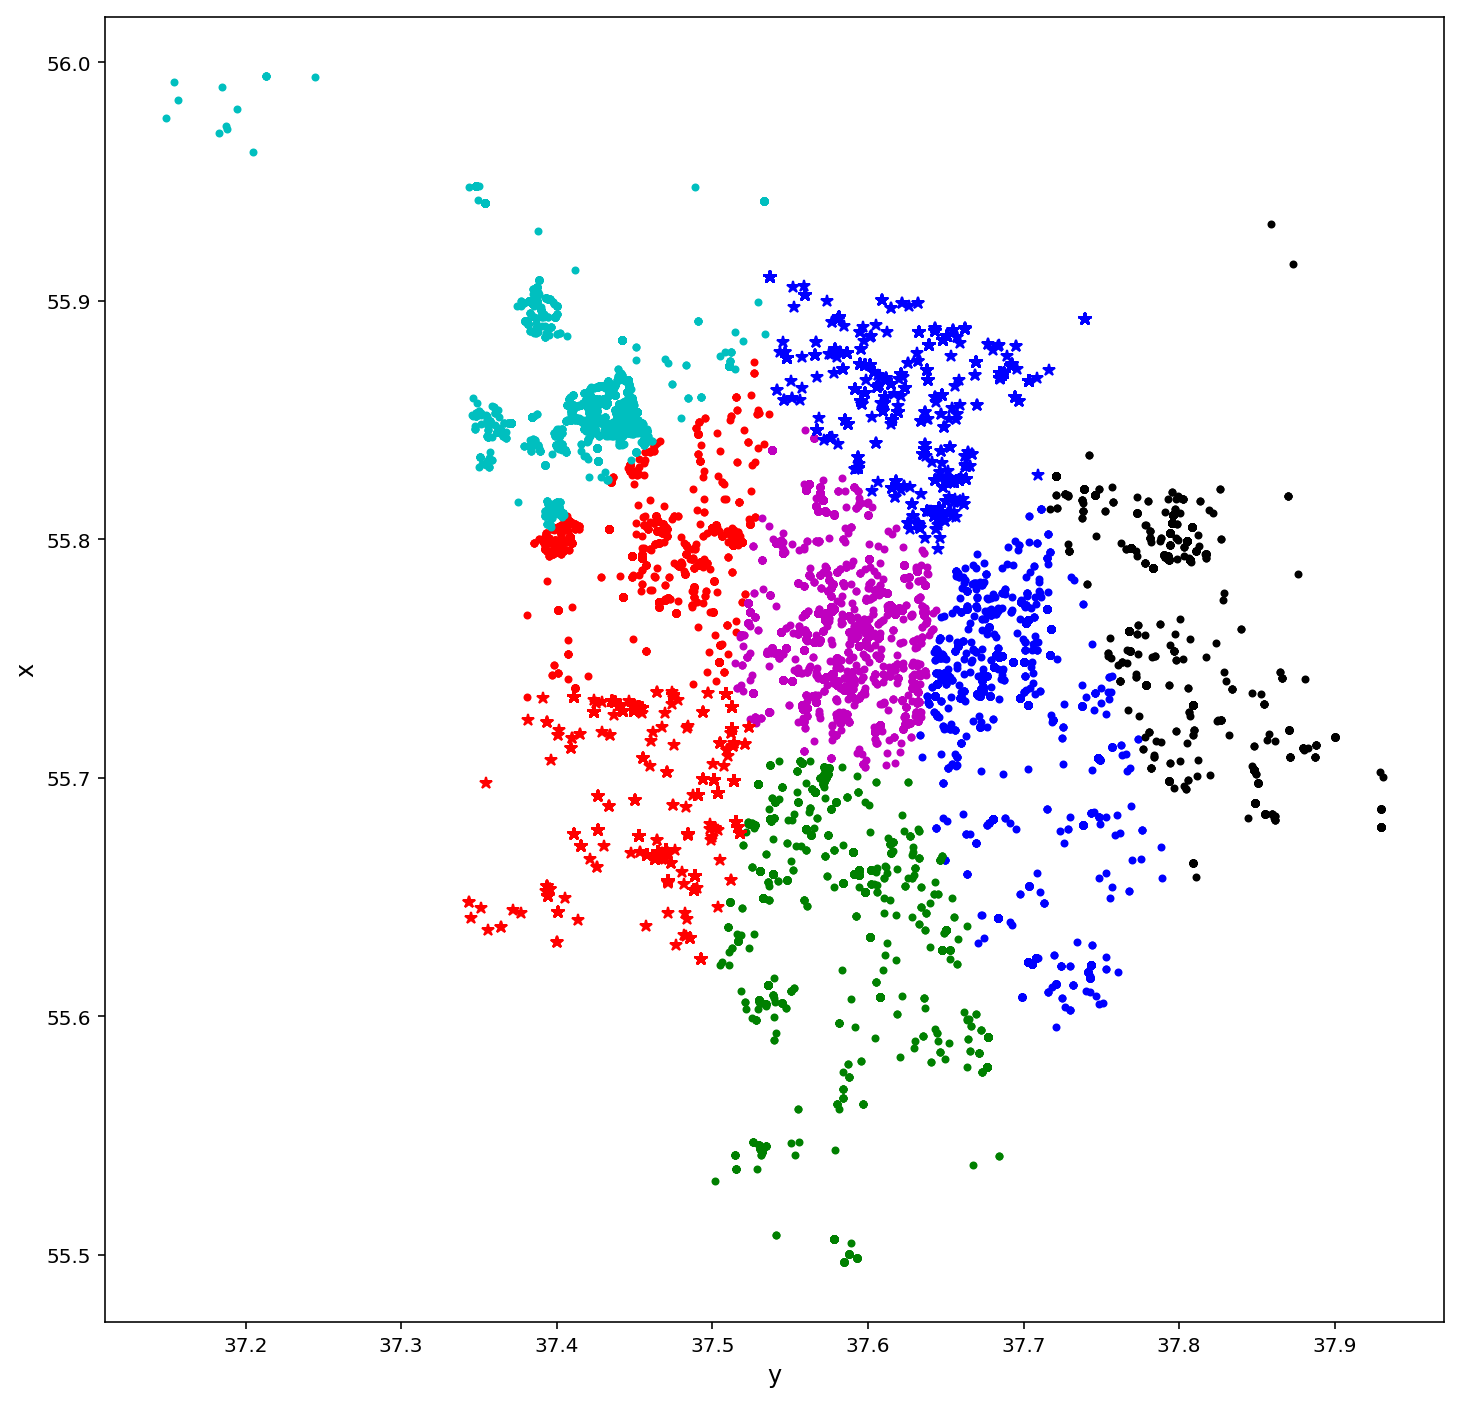

In [28]:
ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*','r*','m*','r^']);
plt.figure(figsize=(12,12))
plt.ylabel('x', fontsize=12)
plt.xlabel('y', fontsize=12)
for i in range(8):
    cluster=np.where(id_label==i)[0]
    plt.plot(X.x[cluster].values,X.y[cluster].values,ptsymb[i])
plt.show()

In [ ]:
#аналогично исследовать скопления голосов за и против отдельно

In [44]:
vote_yes = data_cmt[data_cmt['comment_class'] == 1]

In [45]:
vote_yes.head()

,x,y,comment_class,multiplier,comment
28,37.588916,55.741982,1,1,Не был осведомлен о месте и времени проведения...
45,37.589311,55.734273,1,1,Голосую за зону развития по адресу: Новодевичи...
46,37.558526,55.728758,1,1,Голосую за зону развития по адресу: Новодевичи...
47,37.566431,55.731794,1,1,Голосую за зону развития по адресу: Новодевичи...
61,37.589311,55.734273,1,1,Голосую за зону развития по адресу: Новодевичи...


In [46]:
X_yes=vote_yes.loc[:,['x','y']]

In [47]:
kmeans2 = KMeans(n_clusters=8, random_state=0).fit(X_yes)

In [48]:
id_label_y=kmeans2.labels_

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


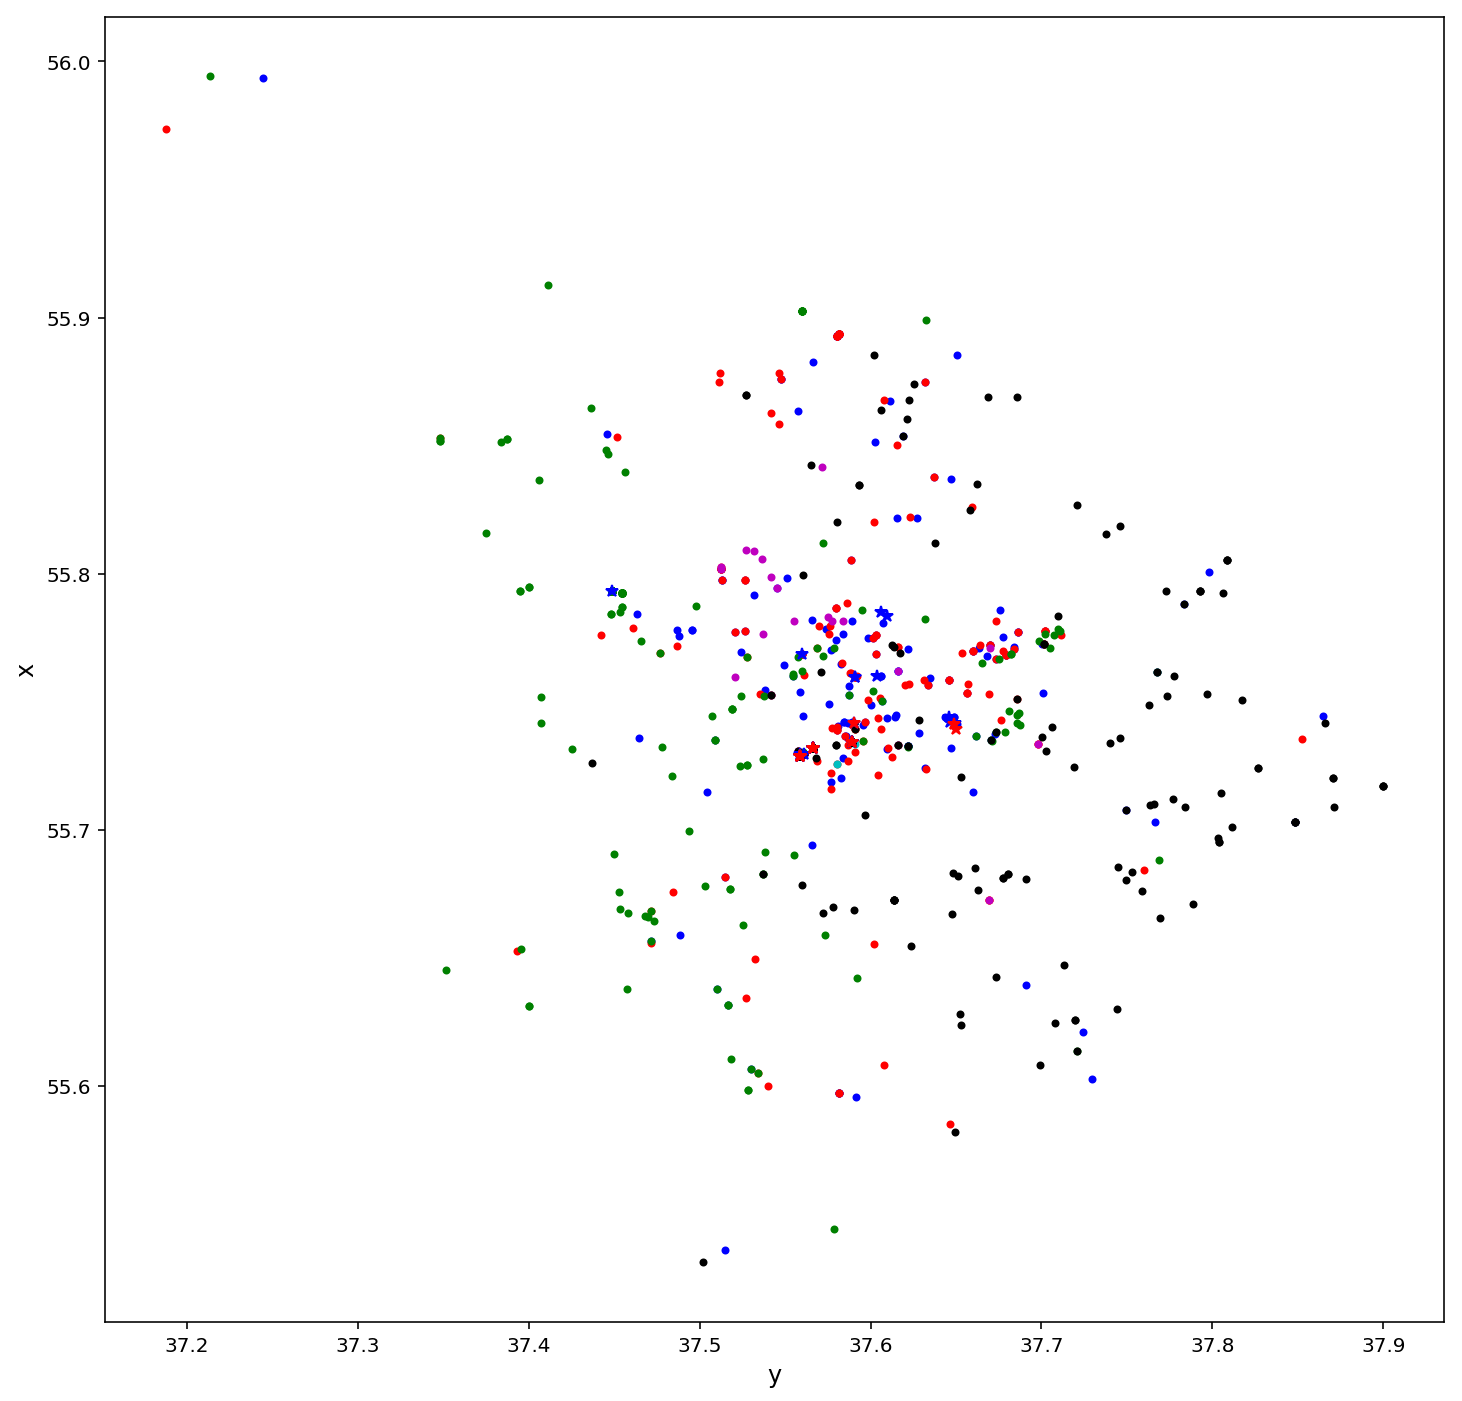

In [49]:
ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*','r*','m*','r^']);
plt.figure(figsize=(12,12))
plt.ylabel('x', fontsize=12)
plt.xlabel('y', fontsize=12)
for i in range(8):
    cluster=np.where(id_label_y==i)[0]
    plt.plot(X_yes.x[cluster].values,X_yes.y[cluster].values,ptsymb[i])
plt.show()

In [50]:
vote_no = data_cmt[data_cmt['comment_class'] == -1]

In [51]:
vote_no.head()

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [52]:
X_no=vote_no.loc[:,['x','y']]

In [53]:
kmeans3 = KMeans(n_clusters=8, random_state=0).fit(X_no)

In [54]:
id_label_n=kmeans3.labels_

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


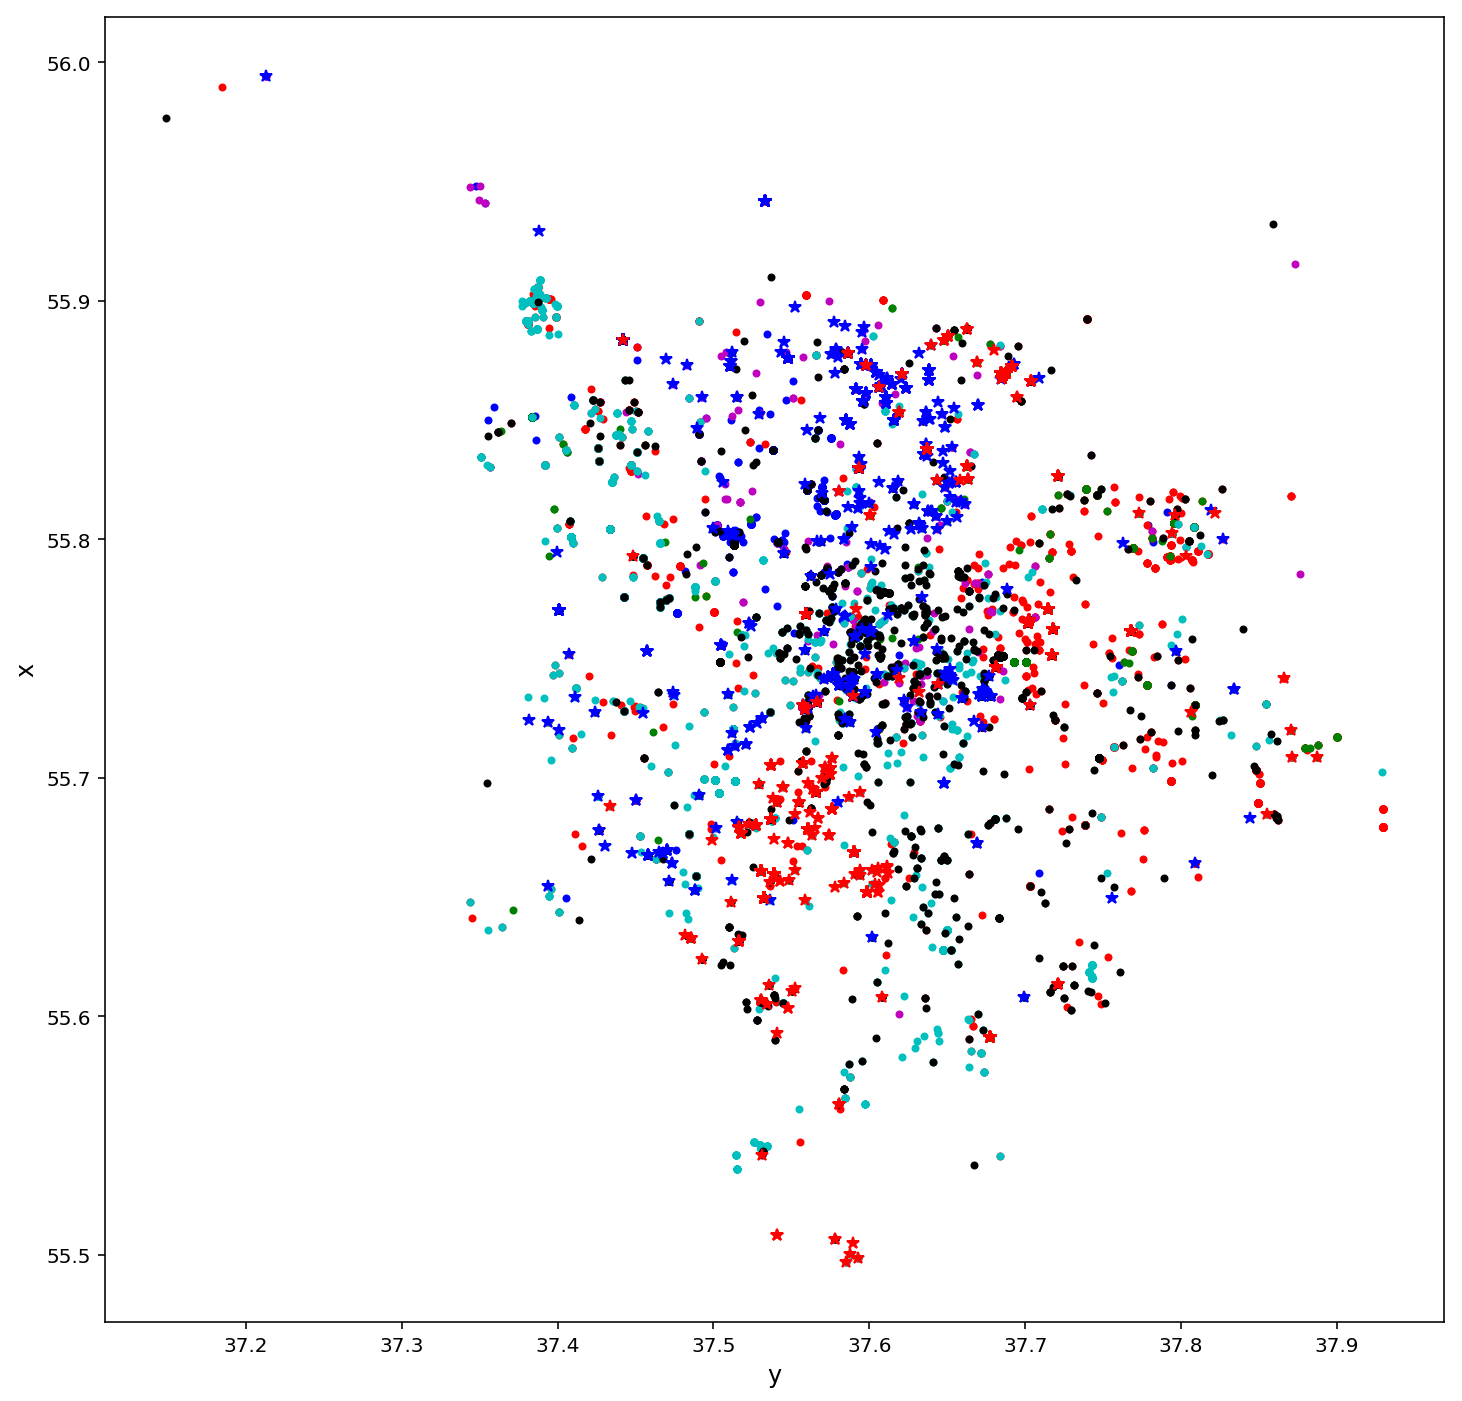

In [55]:
ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*','r*','m*','r^']);
plt.figure(figsize=(12,12))
plt.ylabel('x', fontsize=12)
plt.xlabel('y', fontsize=12)
for i in range(8):
    cluster=np.where(id_label_n==i)[0]
    plt.plot(X_no.x[cluster].values,X_no.y[cluster].values,ptsymb[i])
plt.show()